# Question 2
Download Lena image and a Dog image. Find the Fourier transform of the Lena image, say R1. R1 is a real component of the Lena image and I1 is the imaginary component of the Fourier transform of the Lena image. 

Find the Fourier transform of Dog, call R2 as real and I2 as imaginary. Find IFT ( R1 * e I2 ) and display. Similarly, IFT ( R2 * e I1 ) and display. Observe the relationship between the original Dog and Lena image with respect to the displayed images.

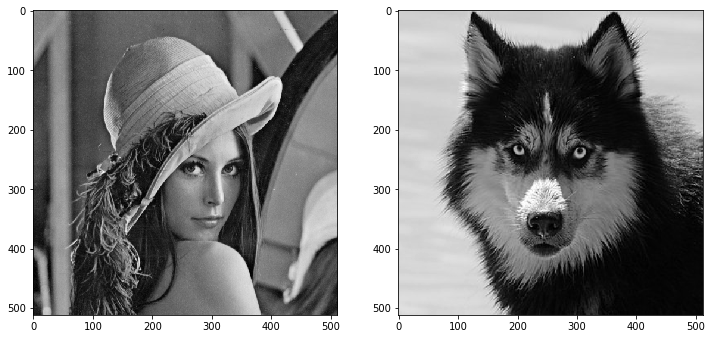

In [70]:
lena = cv2.imread("lena512color.tiff")
lena = cv2.cvtColor(lena,cv2.COLOR_RGB2GRAY)

dog = cv2.imread("dog.jpg")
dog = cv2.resize(dog,(512,512),interpolation = cv2.INTER_AREA)
dog = cv2.cvtColor(dog,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(lena,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dog,cmap="gray")

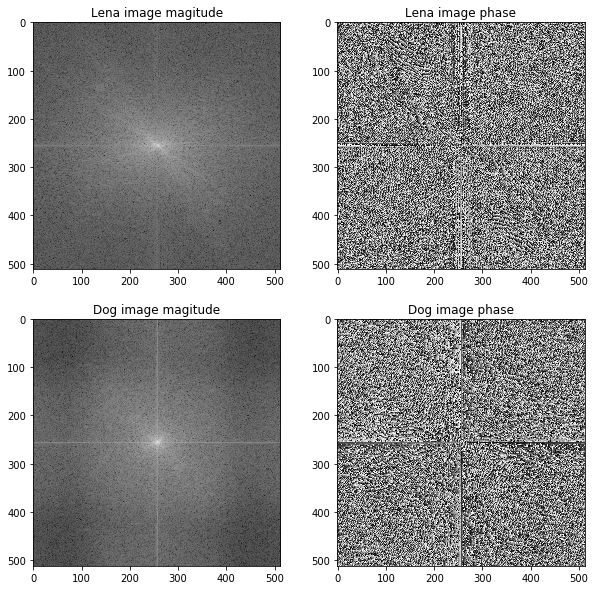

In [119]:
lena_fft = np.fft.fft2(lena)
lena_fft = np.fft.fftshift(lena_fft)
lena_mag, lena_ang = cv2.cartToPolar(np.real(lena_fft),np.imag(lena_fft))

dog_fft = np.fft.fft2(dog)
dog_fft = np.fft.fftshift(dog_fft)
dog_mag, dog_ang = cv2.cartToPolar(np.real(dog_fft),np.imag(dog_fft))

f,ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].set_title("Lena image magitude")
ax[0][0].imshow(np.log(lena_mag),cmap="gray")

ax[0][1].set_title("Lena image phase")
ax[0][1].imshow(lena_ang,cmap="gray")

ax[1][0].set_title("Dog image magitude")
ax[1][0].imshow(np.log(dog_mag),cmap="gray")

ax[1][1].set_title("Dog image phase")
ax[1][1].imshow(dog_ang,cmap="gray")
#plt.imshow(np.log(dog_mag),cmap="gray")

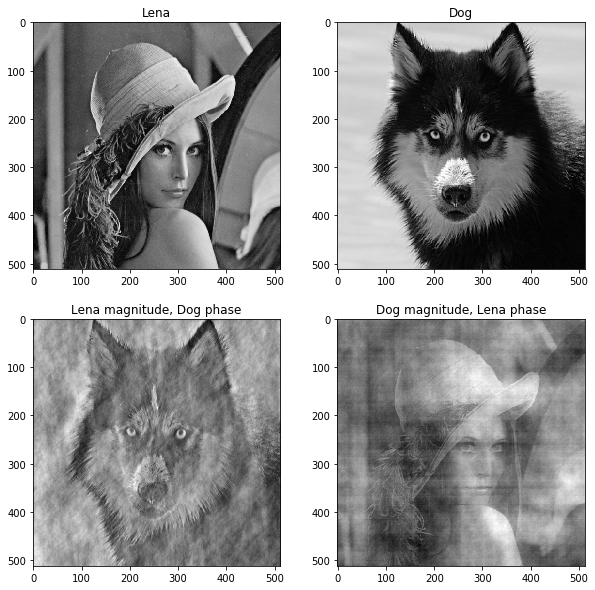

In [152]:
lena_dog = lena_mag*np.exp(1j*dog_ang)
lena_dog = np.fft.ifftshift(lena_dog)
lena_dog = np.fft.ifft2(lena_dog)

dog_lena = dog_mag*np.exp(1j*lena_ang)
dog_lena = np.fft.ifftshift(dog_lena)
dog_lena = np.fft.ifft2(dog_lena)
f,ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].set_title("Lena")
ax[0][0].imshow(np.real(lena),cmap='gray')

ax[0][1].set_title("Dog")
ax[0][1].imshow(np.real(dog),cmap='gray')

ax[1][0].set_title("Lena magnitude, Dog phase")
ax[1][0].imshow(np.real(lena_dog),cmap='gray')

ax[1][1].set_title("Dog magnitude, Lena phase")
ax[1][1].imshow(np.real(dog_lena),cmap='gray')

## Question 5
Write 5 characters of your choice on white paper with a black pen and leave some broken strokes while writing, Take the image of it using a mobile camera and do the following operations. Give your observation:
        1.  Erosion
        2.  Dilation
        3.  Opening
        4.  Closing
        5.  Thickening
        6.  Thinning

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [48]:
def image_preprocess(path_to_image):
    image = cv2.imread(path_to_image)
    img_resize = cv2.resize(image,(512,512),interpolation = cv2.INTER_AREA)
    img_resize = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
    img_resize = cv2.equalizeHist(img_resize)
    img_resize = cv2.bitwise_not(img_resize)
    _,img_resize = cv2.threshold(img_resize,243,255,cv2.THRESH_BINARY)
    return(img_resize)

In [49]:
def morphological_ops(path_to_image):
    A = image_preprocess(path_to_image)
    kernel = np.ones((8,8),np.uint8)

    plt.figure(figsize=(10,10))
    plt.tight_layout()
    
    plt.subplot(1,6,1)
    erosion = cv2.erode(A,kernel,iterations = 1)
    plt.xticks([]),plt.yticks([])
    plt.title("erosion")
    plt.imshow(erosion,cmap='Greys')

    plt.subplot(1,6,2)
    dilate = cv2.dilate(A,kernel,iterations = 1)
    plt.xticks([]),plt.yticks([])
    plt.title("dilation")
    plt.imshow(dilate,cmap='Greys')

    plt.subplot(1,6,3)
    opening = cv2.morphologyEx(A,cv2.MORPH_OPEN,kernel)
    plt.xticks([]),plt.yticks([])
    plt.title("opening")
    plt.imshow(opening,cmap='Greys')

    plt.subplot(1,6,4)
    closing = cv2.morphologyEx(A,cv2.MORPH_CLOSE,kernel)
    plt.xticks([]),plt.yticks([])
    plt.title("closing")
    plt.imshow(closing,cmap='Greys')
    
    plt.subplot(1,6,5)
    thick = cv2.morphologyEx(A,cv2.MORPH_HITMISS,kernel)
    thick = np.bitwise_or(A,thick)
    plt.xticks([]),plt.yticks([])
    plt.title("thickening")
    plt.imshow(thick, cmap='Greys')
    
    plt.subplot(1,6,6)
    thin = cv2.morphologyEx(A,cv2.MORPH_HITMISS,kernel)
    plt.xticks([]),plt.yticks([])
    plt.title("thinning")
    plt.imshow(A-thin, cmap='Greys')    
    
    plt.subplots_adjust(wspace=0.125,hspace=0)
    plt.tight_layout(pad=0, w_pad=0, h_pad=0)

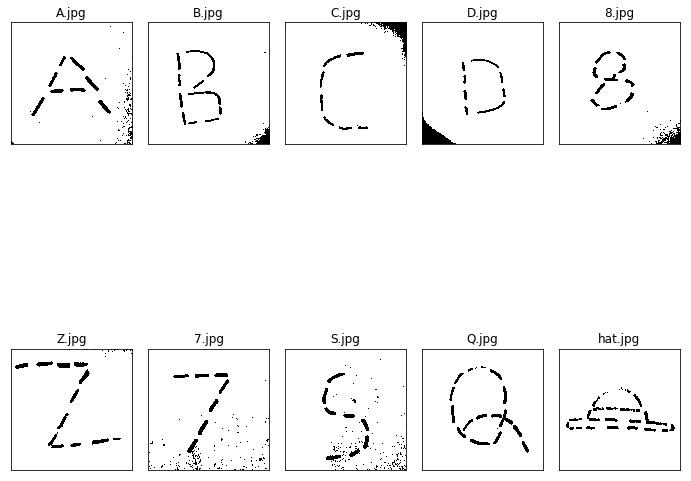

In [56]:
images = ["A.jpg","B.jpg","C.jpg","D.jpg","8.jpg","Z.jpg","7.jpg","S.jpg","Q.jpg","hat.jpg"]

plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(images[i])
    plt.imshow(image_preprocess(images[i]),cmap='Greys')
    plt.xticks([]),plt.yticks([])
plt.subplots_adjust(wspace=0.125,hspace=0)    

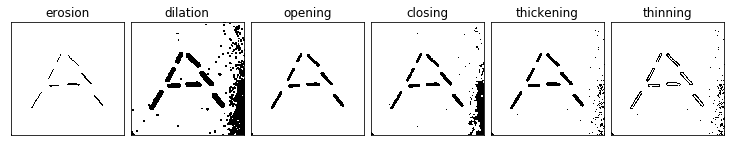

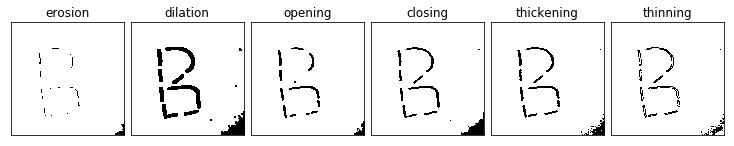

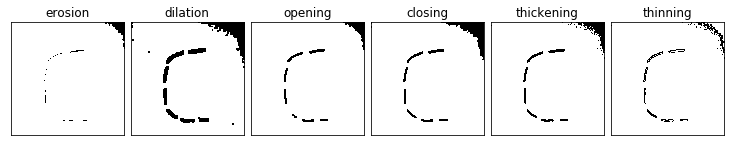

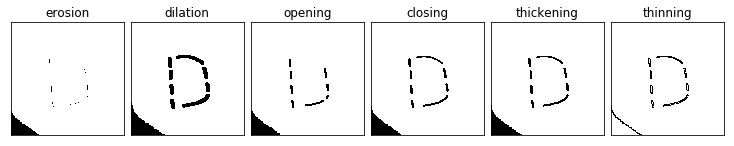

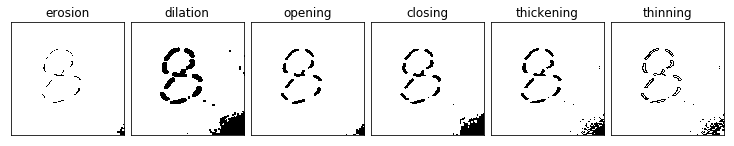

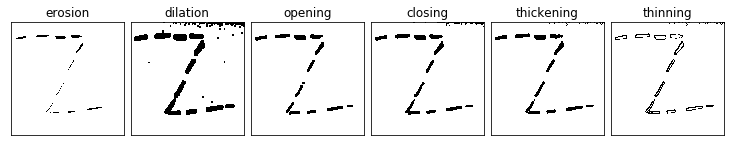

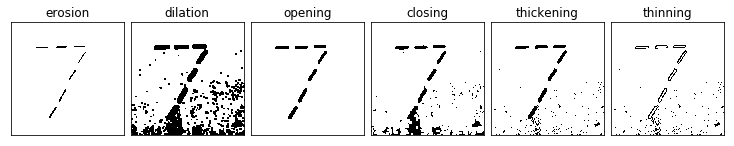

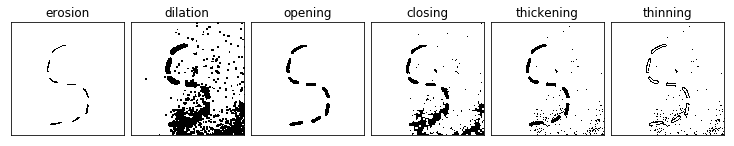

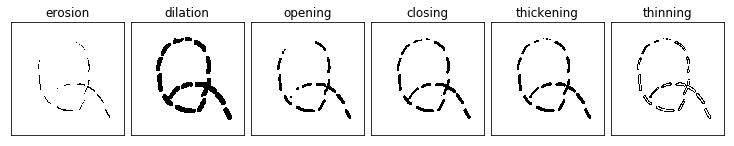

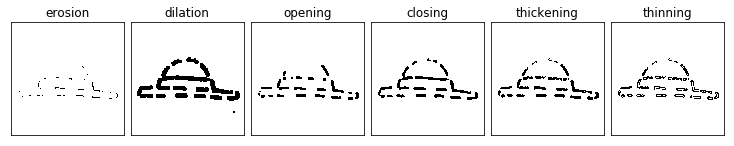

In [51]:
morphological_ops("A.jpg")
morphological_ops("B.jpg")
morphological_ops("C.jpg")
morphological_ops("D.jpg")
morphological_ops("8.jpg")
morphological_ops("Z.jpg")
morphological_ops("7.jpg")
morphological_ops("S.jpg")
morphological_ops("Q.jpg")
morphological_ops("hat.jpg")